In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

# Resumen

- **sorted_df** contiene el dataframe habiendo eliminado las sesiones que no tienen el indice correctamente como dicen en la explicación de la data.
- **under_day_df** contiene el dataframe con las sesiones que han tardado menos de 1 día en acabar el juego.

# Funciones útiles

In [3]:
def round_half(x):
    return round(x * 2) / 2

# Importamos Training Data

In [4]:
full_path = "C:\Projects\EDA GSP"
train_path = os.path.join(full_path, "data", "train.csv")

In [5]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

train_df = pd.read_csv(train_path, dtype=dtypes)

In [6]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [7]:
train_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22


In [8]:
train_df.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
count,2.629695e+07,2.629695e+07,2.629695e+07,2.629695e+07,564544.000000,2.422367e+07,2.422367e+07,2.422367e+07,2.422367e+07,2.002244e+06
mean,2.113249e+16,6.445102e+02,4.016694e+06,1.219169e+01,3.166559,-5.490582e+01,-1.162119e+02,4.584099e+02,3.855858e+02,3.471006e+03
std,5.712953e+14,5.457880e+02,3.127032e+07,6.497789e+00,2.063291,5.202926e+02,2.184710e+02,2.479389e+02,1.298166e+02,4.602024e+05
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181624e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101022e+16,2.880000e+02,4.397000e+05,6.000000e+00,1.000000,-3.528395e+02,-2.127183e+02,2.690000e+02,3.040000e+02,9.900000e+01
50%,2.104021e+16,5.950000e+02,1.014801e+06,1.300000e+01,3.000000,-1.116280e+01,-9.760534e+01,4.470000e+02,3.970000e+02,4.190000e+02
75%,2.110052e+16,8.960000e+02,1.747040e+06,1.800000e+01,5.000000,2.966515e+02,2.268786e+01,6.630000e+02,4.710000e+02,1.266000e+03
max,2.210022e+16,2.047300e+04,1.988607e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.919000e+03,1.440000e+03,2.451637e+08


# Index data cleaning

In [9]:
is_sorted = train_df.groupby('session_id')['index'].apply(lambda x: x.is_monotonic_increasing)

In [10]:
if not is_sorted.all():
    print("The 'index' column is not sorted in ascending order for all sessions.")
else:
    print("The 'index' column is sorted in ascending order for all sessions.")

The 'index' column is not sorted in ascending order for all sessions.


In [11]:
# Filter 'is_sorted' to get only the sessions where 'index' is not sorted.
unsorted_sessions = is_sorted[~is_sorted]

# Create a DataFrame with all rows belonging to the unsorted sessions.
unsorted_df = train_df[train_df['session_id'].isin(unsorted_sessions.index)]

# Print the number of unique unsorted sessions.
print("Number of unique sessions with unsorted 'index':", unsorted_sessions.shape[0])

Number of unique sessions with unsorted 'index': 258


In [12]:
num_unique_sessions = train_df['session_id'].nunique()
print("Number of unique session_ids in train_df:", num_unique_sessions)

Number of unique session_ids in train_df: 23562


In [13]:
round((unsorted_sessions.shape[0]/num_unique_sessions)*100,2)

1.09

Decision: eliminar sesiones con indice que no funciona correctamente.

In [14]:
sorted_sessions = is_sorted[is_sorted].index
sorted_df = train_df[train_df['session_id'].isin(sorted_sessions)]

# Elapsed time understanding

In [15]:
Q1_et = sorted_df['elapsed_time'].quantile(0.25)
Q3_et = sorted_df['elapsed_time'].quantile(0.75)
IQR_et = Q3_et - Q1_et
lower_limit_et = Q1_et - 1.5 * IQR_et
upper_limit_et = Q3_et + 1.5 * IQR_et

In [16]:
upper_limit_et

3707674.5

In [17]:
num_upper_limit = len(sorted_df[sorted_df['elapsed_time']>upper_limit_et]["session_id"].unique())
num_upper_limit

3921

In [18]:
unique_sorted_sessions = len(sorted_df["session_id"].unique())
unique_sorted_sessions

23304

In [19]:
round((num_upper_limit/unique_sorted_sessions)*100,2)

16.83

In [20]:
# Find the sessions where 'elapsed_time' exceeds one day.
over_day_sessions = sorted_df[sorted_df['elapsed_time'] >= 8.64e+7]['session_id'].unique()

# Exclude these sessions from your DataFrame.
under_day_df = sorted_df[~sorted_df['session_id'].isin(over_day_sessions)].copy()
over_day_df = sorted_df[sorted_df['session_id'].isin(over_day_sessions)].copy()


In [21]:
num_over_day_sessions = len(over_day_sessions)
num_over_day_sessions

366

In [22]:
under_day_df["elapsed_time"].describe()

count    2.554471e+07
mean     2.113685e+06
std      7.033144e+06
min      0.000000e+00
25%      4.370390e+05
50%      1.006204e+06
75%      1.721886e+06
max      8.638946e+07
Name: elapsed_time, dtype: float64

In [23]:
# Aplicamos transformación logarítmica a "elapsed_time"
# under_day_df.loc[:, 'elapsed_time_log'] = (np.log(under_day_df['elapsed_time'] + 1)).round()
# over_day_df.loc[:, 'elapsed_time_log'] = (np.log(over_day_df['elapsed_time'] + 1)).round()


In [24]:
under_day_df['elapsed_time_log'] = (under_day_df['elapsed_time']+1).apply(np.log).apply(round_half)
over_day_df['elapsed_time_log'] = (over_day_df['elapsed_time']+1).apply(np.log).apply(round_half)

In [25]:
grouped_df = under_day_df.groupby('elapsed_time_log')['event_name'].count().reset_index()
grouped_df_2 = over_day_df.groupby('elapsed_time_log')['event_name'].count().reset_index()

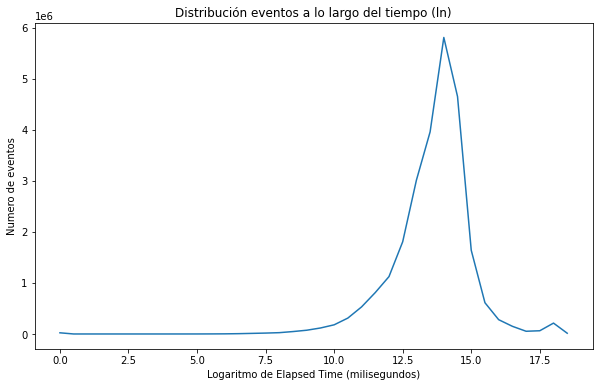

In [26]:
# Plot distribución eventos a lo largo del tiempo (ln) Sesiones por debajo de 1 día
plt.figure(figsize=(10,6))
plt.plot(grouped_df['elapsed_time_log'], grouped_df['event_name'])
plt.xlabel('Logaritmo de Elapsed Time (milisegundos)')
plt.ylabel('Numero de eventos')
plt.title('Distribución eventos a lo largo del tiempo (ln)')
plt.show()

## Sesiones de usuarios que han estado más de 1 día para acabar el juego.

In [27]:
round(len(over_day_sessions)/unique_sorted_sessions*100,2)

1.57

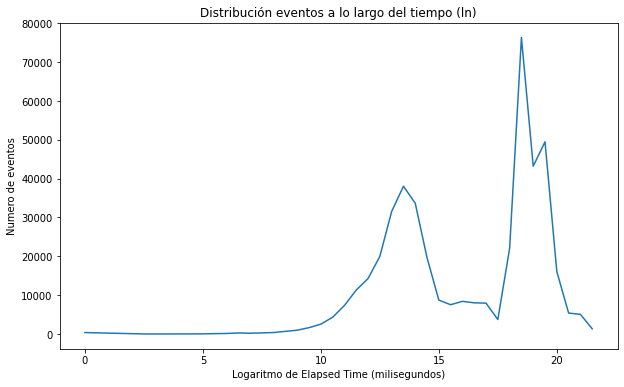

In [28]:
# Plot distribución eventos a lo largo del tiempo (ln) Sesiones por encima de 1 día
plt.figure(figsize=(10,6))
plt.plot(grouped_df_2['elapsed_time_log'], grouped_df_2['event_name'])
plt.xlabel('Logaritmo de Elapsed Time (milisegundos)')
plt.ylabel('Numero de eventos')
plt.title('Distribución eventos a lo largo del tiempo (ln)')
plt.show()

### Crear Dataframe con sesiones por encima de 1 día para tratarlos distinto.

# Todos las sesiones llegan al lv 22?

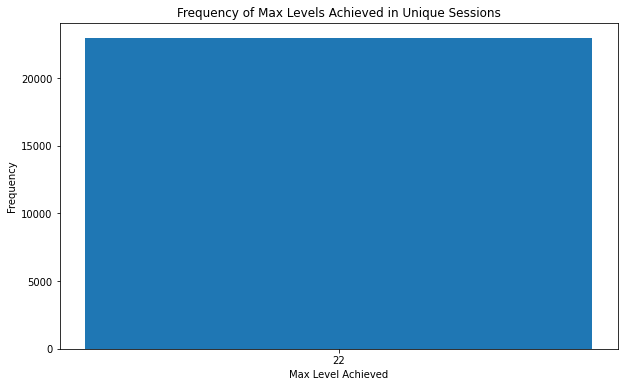

In [29]:
# Get the max level for each session
max_levels = under_day_df.groupby('session_id')['level'].max().astype(str)

# Count the frequency of each max level
level_counts = max_levels.value_counts().sort_index()

# Plot the frequency of max levels
plt.figure(figsize=(10,6))
plt.bar(level_counts.index, level_counts.values)
plt.xlabel('Max Level Achieved')
plt.ylabel('Frequency')
plt.title('Frequency of Max Levels Achieved in Unique Sessions')
plt.show()

In [30]:
# Group by 'session_id' and get the max level for each session
max_levels_all_sessions = train_df.groupby('session_id')['level'].max()

# Find the session_ids where the max level is less than 22
not_reached_22_sessions = max_levels_all_sessions[max_levels_all_sessions < 22].index

# Count the number of sessions that haven't reached level 22
num_not_reached_22 = len(not_reached_22_sessions)

print(f"There are {num_not_reached_22} sessions that have not reached level 22.")


There are 0 sessions that have not reached level 22.


# Duplicates

In [31]:
duplicates = under_day_df.duplicated()

In [32]:
under_day_df[duplicates]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log


No hay duplicados

# Missing Values

In [33]:
under_day_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,6.5
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.5


In [34]:
under_day_df.isna().sum()

session_id                 0
index                      0
elapsed_time               0
event_name                 0
name                       0
level                      0
page                24998090
room_coor_x          2009598
room_coor_y          2009598
screen_coor_x        2009598
screen_coor_y        2009598
hover_duration      23604235
text                16190666
fqid                 8032069
room_fqid                  0
text_fqid           16190564
fullscreen                 0
hq                         0
music                      0
level_group                0
elapsed_time_log           0
dtype: int64

In [35]:
text_difference_mv = 16484716-16484611
text_difference_mv

105

## MV Page

In [36]:
under_day_df[under_day_df["page"].isnull()]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,6.5
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,...,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,...,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5


In [37]:
list(under_day_df[under_day_df["page"].isnull()]["event_name"].unique())

['cutscene_click',
 'person_click',
 'navigate_click',
 'observation_click',
 'notification_click',
 'object_click',
 'object_hover',
 'map_hover',
 'map_click',
 'checkpoint']

In [38]:
list(under_day_df["event_name"].unique())

['cutscene_click',
 'person_click',
 'navigate_click',
 'observation_click',
 'notification_click',
 'object_click',
 'object_hover',
 'map_hover',
 'map_click',
 'checkpoint',
 'notebook_click']

In [39]:
under_day_df[under_day_df["page"].isnull()]["fqid"].unique()

['intro', 'gramps', 'teddy', 'photo', NaN, ..., 'block_badge', 'fox', 'block_badge_2', 'block_1', 'chap2_finale']
Length: 129
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

No hay missing values, los valores que no están son porque page va referenciado a la libreta ("notebook"). Si la libreta no está abierta no habrá page.

## MV Coords

### Room Coords

In [40]:
under_day_df[under_day_df["room_coor_x"].isnull()]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log
49,20090312431273200,49,52328,object_hover,basic,1,NaN,NaN,NaN,NaN,...,7899.0,NaN,groupconvo,tunic.historicalsociety.entry,NaN,0,0,1,0-4,11.0
82,20090312431273200,82,87242,object_hover,basic,2,NaN,NaN,NaN,NaN,...,400.0,NaN,tunic,tunic.historicalsociety.collection,NaN,0,0,1,0-4,11.5
87,20090312431273200,87,92242,object_hover,undefined,2,NaN,NaN,NaN,NaN,...,3949.0,NaN,tunic.hub.slip,tunic.historicalsociety.collection,NaN,0,0,1,0-4,11.5
127,20090312431273200,127,135124,map_hover,basic,3,NaN,NaN,NaN,NaN,...,234.0,NaN,tunic.historicalsociety,tunic.historicalsociety.entry,NaN,0,0,1,0-4,12.0
128,20090312431273200,128,135256,map_hover,basic,3,NaN,NaN,NaN,NaN,...,17.0,NaN,tunic.kohlcenter,tunic.historicalsociety.entry,NaN,0,0,1,0-4,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296928,22100221145014656,1587,5448152,object_hover,undefined,21,NaN,NaN,NaN,NaN,...,565.0,NaN,journals_flag.pic_2.next,tunic.historicalsociety.stacks,NaN,0,0,1,13-22,15.5
26296929,22100221145014656,1588,5466868,object_hover,undefined,21,NaN,NaN,NaN,NaN,...,150.0,NaN,journals_flag.pic_0.next,tunic.historicalsociety.stacks,NaN,0,0,1,13-22,15.5
26296938,22100221145014656,1597,5482022,map_hover,basic,22,NaN,NaN,NaN,NaN,...,1200.0,NaN,tomap,tunic.historicalsociety.entry,NaN,0,0,1,13-22,15.5
26296939,22100221145014656,1598,5481765,map_hover,basic,22,NaN,NaN,NaN,NaN,...,51.0,NaN,tunic.drycleaner,tunic.historicalsociety.entry,NaN,0,0,1,13-22,15.5


In [41]:
list(under_day_df[under_day_df["room_coor_x"].isnull()]["event_name"].unique())

['object_hover', 'map_hover', 'checkpoint']

In [42]:
list(under_day_df[under_day_df["room_coor_y"].isnull()]["event_name"].unique())

['object_hover', 'map_hover', 'checkpoint']

### Screen Coords

In [43]:
list(under_day_df[under_day_df["screen_coor_x"].isnull()]["event_name"].unique())

['object_hover', 'map_hover', 'checkpoint']

In [44]:
list(under_day_df[under_day_df["screen_coor_y"].isnull()]["event_name"].unique())

['object_hover', 'map_hover', 'checkpoint']

## MV Hover duration

In [45]:
under_day_df[under_day_df["hover_duration"].isnull()]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,6.5
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,...,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,...,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5


In [46]:
list(under_day_df[under_day_df["hover_duration"].isnull()]["event_name"].unique())

['cutscene_click',
 'person_click',
 'navigate_click',
 'observation_click',
 'notification_click',
 'object_click',
 'map_click',
 'checkpoint',
 'notebook_click']

## MV FQID

fqid - the fully qualified ID of the event

In [47]:
under_day_df[under_day_df["fqid"].isnull()]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log
14,20090312431273200,14,14814,navigate_click,undefined,0,NaN,273.991425,-196.802368,406.0,...,NaN,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.5
15,20090312431273200,15,15498,navigate_click,undefined,0,NaN,185.708466,-205.806534,363.0,...,NaN,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.5
16,20090312431273200,16,16046,navigate_click,undefined,0,NaN,0.583565,-225.691299,234.0,...,NaN,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.5
17,20090312431273200,17,17462,navigate_click,undefined,0,NaN,350.344269,-173.948624,766.0,...,NaN,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,10.0
18,20090312431273200,18,18164,navigate_click,undefined,0,NaN,-37.961716,-255.711121,301.0,...,NaN,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296933,22100221145014656,1592,5473806,notebook_click,basic,22,6.0,35.565876,-202.179367,469.0,...,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,13-22,15.5
26296934,22100221145014656,1593,5474807,notebook_click,basic,22,6.0,330.938324,275.636627,765.0,...,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,13-22,15.5
26296935,22100221145014656,1594,5475056,notebook_click,close,22,6.0,399.894226,251.623703,834.0,...,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,13-22,15.5
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,...,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5


In [49]:
list(under_day_df[under_day_df["fqid"].isnull()]["event_name"].unique())

['navigate_click', 'notification_click', 'map_click', 'notebook_click']

In [50]:
list(under_day_df[under_day_df["fqid"].isnull()]["name"].unique())

['undefined', 'basic', 'close', 'open', 'prev', 'next']

In [51]:
under_day_df[under_day_df["fqid"].isnull()]["name"].value_counts()

name
undefined    6781807
basic         737207
close         255483
open          227809
prev           18577
next           11186
Name: count, dtype: int64

In [52]:
under_day_df[under_day_df["event_name"]=="navigate_click"]["name"].unique()

['undefined']
Categories (6, object): ['basic', 'close', 'next', 'open', 'prev', 'undefined']

### Indagar en FQID

In [53]:
event_names_with_null_fqid = list(under_day_df[under_day_df["fqid"].isnull()]["event_name"].unique())

for event in event_names_with_null_fqid:
    non_null_fqids = under_day_df[(under_day_df["event_name"] == event) & (under_day_df["fqid"].notnull())]
    
    if not non_null_fqids.empty:
        print(f'The event {event} has the following non-null fqid values: ')
        print(non_null_fqids['fqid'].unique())
        print()
    else:
        print(f'The event {event} does not have any non-null fqid values.')


The event navigate_click has the following non-null fqid values: 
['teddy', 'photo', 'notebook', 'retirement_letter', 'tobasement', ..., 'block_badge', 'fox', 'block_badge_2', 'block_1', 'chap2_finale']
Length: 71
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

The event notification_click does not have any non-null fqid values.
The event map_click has the following non-null fqid values: 
['tunic.kohlcenter', 'tunic.capitol_0', 'tunic.historicalsociety', 'tunic.humanecology', 'tunic.drycleaner', 'tunic.library', 'tunic.capitol_1', 'tunic.wildlife', 'tunic.flaghouse', 'tunic.capitol_2']
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

The event notebook_click does not have any non-null fqid values.


In [54]:
event = 'navigate_click'
data = under_day_df[(under_day_df["event_name"] == event) & (under_day_df["fqid"].notnull())]

for level_group, group_data in data.groupby('level_group'):
    print(f'Level group: {level_group}')
    print('Non-null fqid values:')
    print(group_data['fqid'].unique())
    print()

Level group: 0-4
Non-null fqid values:
['teddy', 'photo', 'notebook', 'retirement_letter', 'tobasement', ..., 'block_tocollection', 'doorblock', 'block_tomap2', 'block_tomap1', 'block_0']
Length: 25
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

Level group: 13-22
Non-null fqid values:
['toentry', 'tobasement', 'seescratches', 'gramps', 'tocage', ..., 'tunic', 'outtolunch', 'need_glasses', 'block_nelson', 'fox']
Length: 46
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

Level group: 5-12
Non-null fqid values:
['boss', 'toentry', 'tobasement', 'tocloset_dirty', 'gramps', ..., 'plaque', 'block_badge', 'block_badge_2', 'block_1', 'chap2_finale']
Length: 37
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']



In [55]:
list(under_day_df["event_name"].unique())

['cutscene_click',
 'person_click',
 'navigate_click',
 'observation_click',
 'notification_click',
 'object_click',
 'object_hover',
 'map_hover',
 'map_click',
 'checkpoint',
 'notebook_click']

In [56]:
unique_event_names = under_day_df[under_day_df['room_coor_x'].notnull()]['event_name'].unique()
print(unique_event_names)
print()
print(len(unique_event_names))

['cutscene_click', 'person_click', 'navigate_click', 'observation_click', 'notification_click', 'object_click', 'map_click', 'notebook_click']
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

8


In [57]:
all_event_names = set(under_day_df["event_name"].unique())

# Event names where "room_coor_x" is not null
room_coor_x_event_names = set(under_day_df[under_day_df['room_coor_x'].notnull()]['event_name'].unique())

# Event names in room_coor_x_event_names but not in all_event_names
missing_event_names = all_event_names.difference(room_coor_x_event_names)

print(missing_event_names)

{'object_hover', 'checkpoint', 'map_hover'}


## MV text

In [58]:
under_day_df.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group', 'elapsed_time_log'],
      dtype='object')

In [59]:
text_event_names = set(under_day_df[under_day_df["text"].isnull()]["event_name"].unique())

missing_text_event_names = all_event_names.difference(text_event_names)

print(missing_text_event_names)

{'cutscene_click', 'observation_click'}


In [60]:
text_event_names

{'checkpoint',
 'map_click',
 'map_hover',
 'navigate_click',
 'notebook_click',
 'notification_click',
 'object_click',
 'object_hover',
 'person_click'}

### Observation_click

In [61]:
under_day_df[under_day_df["event_name"]=="observation_click"]["name"].unique()

['basic']
Categories (6, object): ['basic', 'close', 'next', 'open', 'prev', 'undefined']

In [62]:
under_day_df[under_day_df["event_name"]=="observation_click"]["fqid"].unique()

['photo', 'janitor', 'outtolunch', 'magnify', 'key', ..., 'need_glasses', 'block_nelson', 'block_tomap1', 'block_badge_2', 'block_1']
Length: 19
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

In [63]:
under_day_df[under_day_df["event_name"]=="observation_click"]["room_fqid"].unique()

['tunic.historicalsociety.closet', 'tunic.historicalsociety.basement', 'tunic.historicalsociety.stacks', 'tunic.historicalsociety.frontdesk', 'tunic.wildlife.center', ..., 'tunic.humanecology.frontdesk', 'tunic.library.frontdesk', 'tunic.kohlcenter.halloffame', 'tunic.drycleaner.frontdesk', 'tunic.library.microfiche']
Length: 13
Categories (19, object): ['tunic.capitol_0.hall', 'tunic.capitol_1.hall', 'tunic.capitol_2.hall', 'tunic.drycleaner.frontdesk', ..., 'tunic.kohlcenter.halloffame', 'tunic.library.frontdesk', 'tunic.library.microfiche', 'tunic.wildlife.center']

In [64]:
under_day_df[under_day_df["event_name"]=="observation_click"]["text"].unique()

['I love these photos of me and Teddy!', 'Hmm. Button's still not working.', 'Better check back later.', 'I bet the archivist could use this!', 'Yes! It's the key for Teddy's cage!', ..., 'I should find out if she can help me!', 'The libarian said I could find some informati..., 'I should ask the librarian why Wells was here.', 'I wonder if there's a clue in those business ..., 'I should check that logbook to see who owned ...]
Length: 25
Categories (597, object): ['*COUGH COUGH COUGH*', '*cough cough*', '*grumble grumble*', 'A boring old shirt.', ..., 'Wells sabotaged Gramps!', 'Wells! Where's Teddy? Is he okay?', 'Who is Teddy?', 'Why don't you prove your case?']

In [65]:
under_day_df[under_day_df["event_name"]=="observation_click"]["text"].value_counts()

text
It's locked!                                                                            26231
I bet the archivist could use this!                                                     23150
It's OK, girl! Look, I found you a cricket!                                             23127
Yes! It's the key for Teddy's cage!                                                     23100
People sure drink a lot of coffee around here.                                          22910
                                                                                        ...  
I need to get to the Capitol and tell Gramps!                                               0
I need to learn more about this flag!                                                       0
I need to take the artifact upstairs. Why don't you investigate those scratch marks?        0
I need your help!                                                                           0
Why don't you prove your case?                         

## MV text_fqid

In [66]:
text_fqid_event_names = set(under_day_df[under_day_df["text_fqid"].isnull()]["event_name"].unique())
text_fqid_event_names

{'checkpoint',
 'map_click',
 'map_hover',
 'navigate_click',
 'notebook_click',
 'object_click',
 'object_hover'}

In [67]:
missing_text_fqid_event_names = all_event_names.difference(text_fqid_event_names)

print(missing_text_fqid_event_names)

{'notification_click', 'cutscene_click', 'observation_click', 'person_click'}


In [68]:
print(missing_text_fqid_event_names.difference(missing_text_event_names))

{'notification_click', 'person_click'}


## Diferencia entre MV de text y text_fqid

In [69]:
text_mv_df= under_day_df[(under_day_df['text'].isnull()) & (under_day_df['text_fqid'].notnull())]
text_mv_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log
299422,20100114224046390,123,136051,person_click,basic,1,NaN,114.378166,105.424698,533.0,...,NaN,NaN,gramps,tunic.historicalsociety.entry,tunic.historicalsociety.entry.gramps.hub,0,0,1,0-4,12.0
660031,20100307371130370,51,64360,person_click,basic,1,NaN,-50.394051,9.397367,432.0,...,NaN,NaN,gramps,tunic.historicalsociety.entry,tunic.historicalsociety.entry.gramps.hub,0,0,1,0-4,11.0
1727007,20110114003348764,632,1249264,notification_click,basic,15,NaN,-275.873718,-373.517761,394.0,...,NaN,NaN,NaN,tunic.historicalsociety.entry,tunic.historicalsociety.entry.directory.closeu...,0,0,1,13-22,14.0
1727008,20110114003348764,633,1250602,notification_click,basic,15,NaN,-305.197906,-386.544678,376.0,...,NaN,NaN,NaN,tunic.historicalsociety.entry,tunic.historicalsociety.entry.directory.closeu...,0,0,1,13-22,14.0
1806929,20110119005511204,2382,612123,notification_click,basic,21,NaN,93.311218,54.747627,458.0,...,NaN,NaN,NaN,tunic.historicalsociety.stacks,tunic.historicalsociety.stacks.journals_flag.p...,0,0,1,13-22,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24318098,22050112514910092,34,136999,person_click,basic,1,NaN,-24.455563,-204.358170,446.0,...,NaN,NaN,gramps,tunic.historicalsociety.entry,tunic.historicalsociety.entry.gramps.hub,0,0,1,0-4,12.0
24437716,22050310163640436,33,86622,person_click,basic,1,NaN,160.535233,-38.457359,551.0,...,NaN,NaN,gramps,tunic.historicalsociety.entry,tunic.historicalsociety.entry.gramps.hub,0,0,1,0-4,11.5
24980707,22070210112928264,44,34408,person_click,basic,1,NaN,324.620911,-257.642700,661.0,...,NaN,NaN,gramps,tunic.historicalsociety.entry,tunic.historicalsociety.entry.gramps.hub,0,0,1,0-4,10.5
25143348,22070413190991200,48,82905,person_click,basic,1,NaN,110.192589,-117.469971,540.0,...,NaN,NaN,gramps,tunic.historicalsociety.entry,tunic.historicalsociety.entry.gramps.hub,0,0,1,0-4,11.5


In [70]:
text_difference_mv

105

Las filas equivalen a la diferencia de los missing values.

In [71]:
under_day_df[(under_day_df['text'].notnull()) & (under_day_df['text_fqid'].isnull())]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log


### Estudio de text_mv_df

In [72]:
len(text_mv_df["session_id"].unique())


54

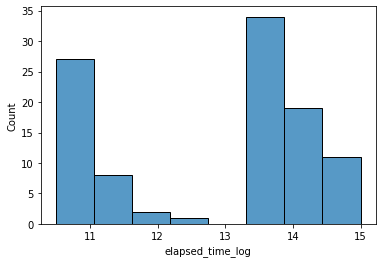

In [73]:
sns.histplot(data=text_mv_df, x="elapsed_time_log")
plt.show()

In [74]:
text_mv_df["fqid"].unique()

['gramps', NaN]
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

In [75]:
text_mv_df["event_name"].unique()

['person_click', 'notification_click']
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [76]:
set(text_mv_df["text_fqid"].unique())

{'tunic.historicalsociety.entry.directory.closeup.archivist',
 'tunic.historicalsociety.entry.gramps.hub',
 'tunic.historicalsociety.stacks.journals.pic_2.bingo',
 'tunic.historicalsociety.stacks.journals_flag.pic_0.bingo',
 'tunic.historicalsociety.stacks.journals_flag.pic_2.bingo'}

In [77]:
set(text_mv_df[text_mv_df["event_name"]=="notification_click"]["text_fqid"].unique())

{'tunic.historicalsociety.entry.directory.closeup.archivist',
 'tunic.historicalsociety.stacks.journals.pic_2.bingo',
 'tunic.historicalsociety.stacks.journals_flag.pic_0.bingo',
 'tunic.historicalsociety.stacks.journals_flag.pic_2.bingo'}

In [78]:
len(under_day_df[under_day_df["text_fqid"]=="tunic.historicalsociety.entry.gramps.hub"]["session_id"].unique())

38

In [79]:
under_day_df[under_day_df["text_fqid"]=="tunic.historicalsociety.entry.gramps.hub"]["level"].unique()

array([1], dtype=uint8)

In [80]:
len(under_day_df["session_id"].unique())

22938

In [81]:
round((38/22938)*100,3)

0.166

Solo hay 38 sesiones que han coincidido con este "text_fqid"

# Diferencia de elapsed time entre eventos

https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/384342#2134312

In [82]:
under_day_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,6.5
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,...,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.0
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,...,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887299,36.701027,483.0,...,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696075,141.493179,545.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912872,140.569199,611.0,...,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299652,123.805893,526.0,...,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5


In [83]:
# Calculate the time difference within each session
under_day_df['time_diff'] = under_day_df.groupby('session_id')['elapsed_time'].diff()

# Replace negative values and NA values with 0
under_day_df['time_diff'] = under_day_df['time_diff'].apply(lambda x: max(0, x) if pd.notnull(x) else 0)


In [84]:
under_day_df["time_diff"].describe()

count    2.554471e+07
mean     3.811535e+03
std      2.986472e+05
min      0.000000e+00
25%      4.630000e+02
50%      9.490000e+02
75%      1.664000e+03
max      8.490589e+07
Name: time_diff, dtype: float64

In [85]:
under_day_df[under_day_df["time_diff"]>1e+04]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log,time_diff
164,20090312431273200,164,194860,checkpoint,basic,4,NaN,NaN,NaN,NaN,...,NaN,chap1_finale_c,tunic.capitol_0.hall,NaN,0,0,1,0-4,12.0,30837.0
165,20090312431273200,175,221485,navigate_click,undefined,5,NaN,280.442169,-19.705837,653.0,...,NaN,boss,tunic.capitol_0.hall,NaN,0,0,1,5-12,12.5,26625.0
461,20090312431273200,512,836732,navigate_click,undefined,13,NaN,290.153564,-204.499359,651.0,...,NaN,NaN,tunic.capitol_1.hall,NaN,0,0,1,13-22,13.5,337497.0
808,20090312431273200,859,1199469,person_click,basic,20,NaN,-165.356628,89.863411,421.0,...,"Welcome back, Dear! How can I help you?",worker,tunic.library.frontdesk,tunic.library.frontdesk.worker.flag,0,0,1,13-22,14.0,38576.0
1019,20090312433251036,138,233752,checkpoint,basic,4,NaN,NaN,NaN,NaN,...,NaN,chap1_finale_c,tunic.capitol_0.hall,NaN,0,0,0,0-4,12.5,37409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296186,22100221145014656,845,4296119,navigate_click,undefined,13,NaN,468.941437,-251.469055,769.0,...,NaN,NaN,tunic.capitol_1.hall,NaN,0,0,1,13-22,15.5,627125.0
26296241,22100221145014656,900,4436753,notebook_click,basic,15,4.0,-448.451294,138.596863,772.0,...,NaN,NaN,tunic.historicalsociety.cage,NaN,0,0,1,13-22,15.5,38321.0
26296414,22100221145014656,1073,4663406,navigate_click,undefined,17,NaN,68.550354,-268.822418,513.0,...,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22,15.5,11224.0
26296606,22100221145014656,1265,4986412,object_click,basic,18,NaN,396.489288,-215.222458,226.0,...,NaN,tracks,tunic.wildlife.center,NaN,0,0,1,13-22,15.5,20141.0


In [112]:
def round_half(x):
    if np.isnan(x):
        return x
    else:
        return round(x * 2) / 2

In [88]:
under_day_df['elapsed_time_diff_log'] = (under_day_df['time_diff']+1).apply(np.log).apply(round_half)

In [89]:
under_day_df["elapsed_time_diff_log"].value_counts()

elapsed_time_diff_log
7.0     5850104
7.5     4534792
6.5     4436253
5.5     2762026
6.0     2583970
8.0     2302595
5.0      833434
8.5      772247
0.0      663648
9.0      240883
4.5      130620
4.0       88703
9.5       81454
3.5       49096
10.0      41178
3.0       40317
10.5      35747
11.0      20086
12.5      12475
2.5       11354
12.0       9835
11.5       9192
2.0        7471
13.0       7128
1.5        4668
0.5        4348
1.0        3371
13.5       2667
14.0       1466
14.5       1149
15.0        791
15.5        500
18.0        401
16.0        333
16.5        164
17.5        160
17.0         78
18.5          3
Name: count, dtype: int64

In [90]:
under_day_df["elapsed_time_diff_log"].describe()

count    2.554471e+07
mean     6.634250e+00
std      1.472153e+00
min      0.000000e+00
25%      6.000000e+00
50%      7.000000e+00
75%      7.500000e+00
max      1.850000e+01
Name: elapsed_time_diff_log, dtype: float64

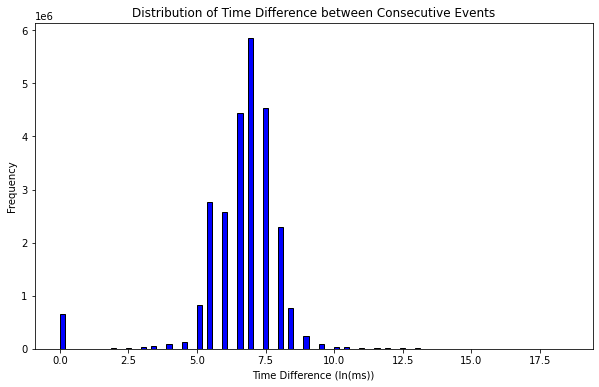

In [91]:
# Create a histogram of 'time_diff'
plt.figure(figsize=(10,6))
plt.hist(under_day_df['elapsed_time_diff_log'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Time Difference between Consecutive Events')
plt.xlabel('Time Difference (ln(ms))')
plt.ylabel('Frequency')
plt.show()

In [92]:
big_time_diff_sessions = under_day_df[under_day_df["time_diff"]>8.4e+07]["session_id"].unique()
big_time_diff_sessions

array([21040212013337450, 21040407421653612, 21050309534255030,
       21090317241695372], dtype=int64)

In [93]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

18.5


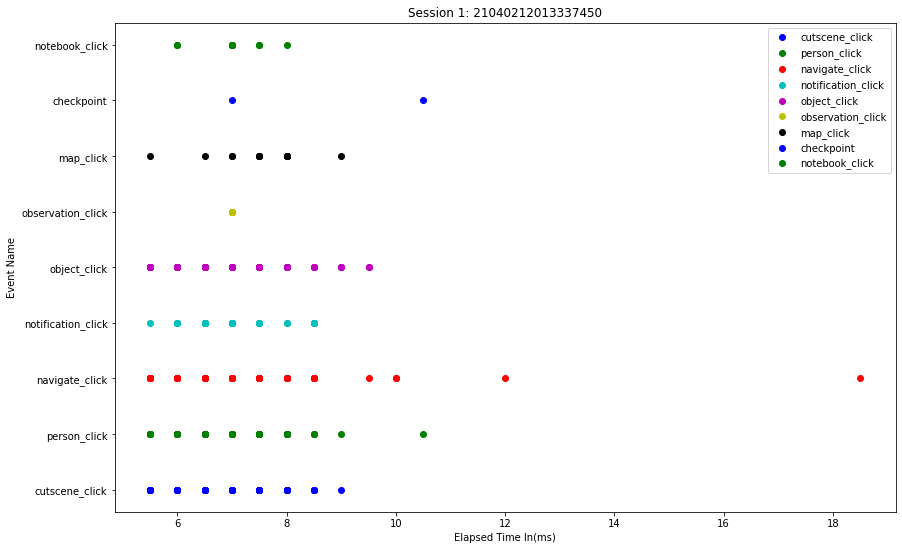

18.5


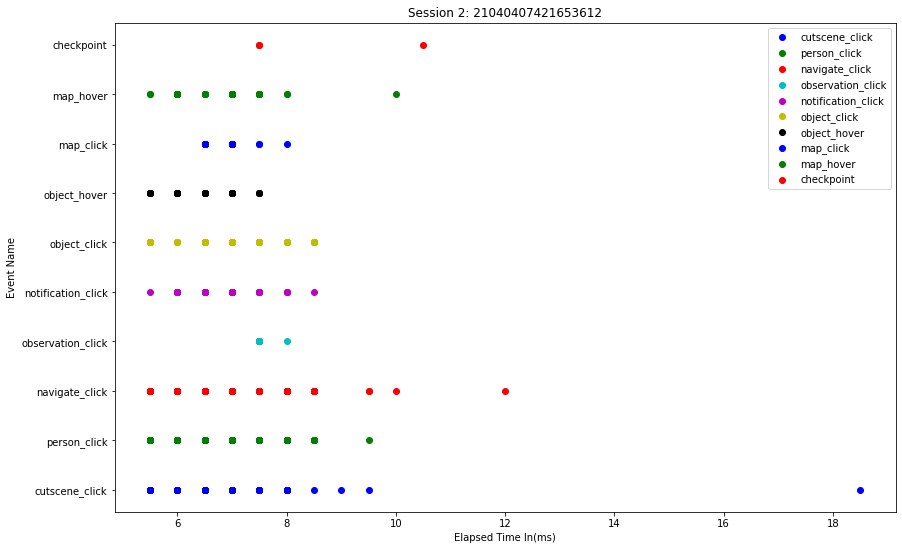

18.0


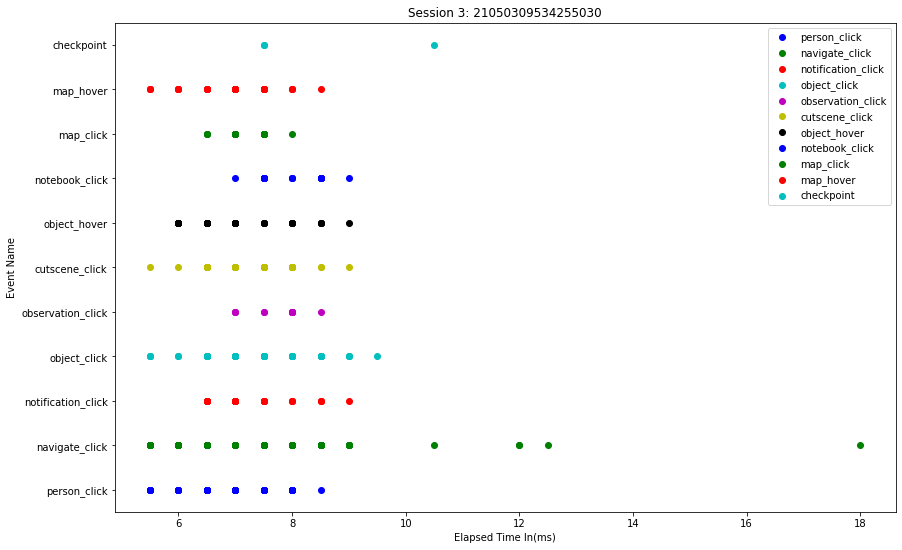

18.5


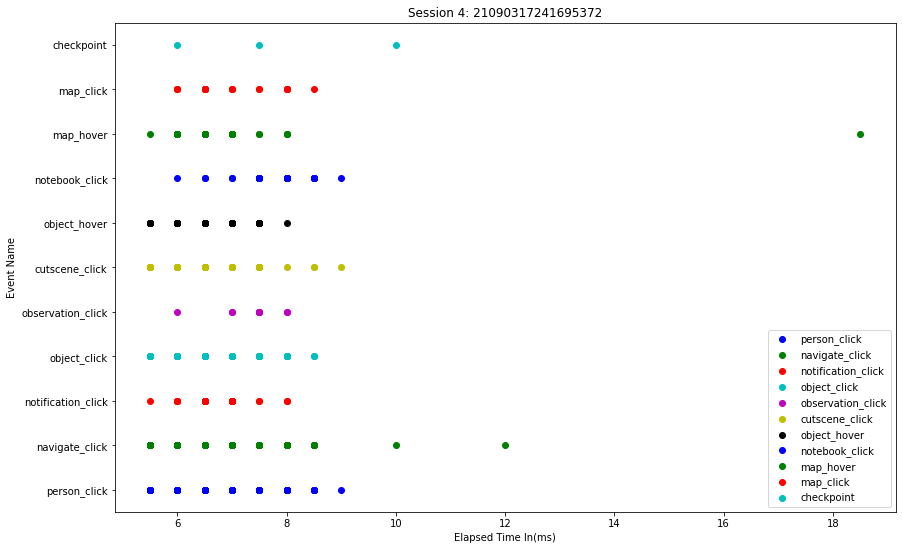

In [94]:
for i, session in enumerate(big_time_diff_sessions):

    # Filter the dataframe for the current session
    session_df = under_day_df[under_day_df['session_id'] == session]

    session_df = session_df[session_df['elapsed_time_diff_log'] > 5]

    print(session_df["elapsed_time_diff_log"].max())
    # Create a new figure
    plt.figure(figsize=(14,9))
    
    # Iterate over the unique events in the session
    for j, event in enumerate(session_df['event_name'].unique()):
        # Filter the dataframe for the current event
        event_df = session_df[session_df['event_name'] == event]

        # Create a scatter plot for the current event
        plt.scatter(event_df['elapsed_time_diff_log'], [event]*len(event_df), color=colors[j % len(colors)], label=event)

    # Set the title and labels
    plt.title(f'Session {i+1}: {session}')
    plt.xlabel('Elapsed Time ln(ms)')
    plt.ylabel('Event Name')
    plt.legend()

    # Show the plot
    plt.show()

In [95]:
under_day_df[under_day_df["time_diff"]>8e+07]["session_id"].unique()

array([21000110281089430, 21000513443670664, 21020010381391016,
       21040112091880150, 21040212013337450, 21040310192981090,
       21040407421653612, 21040410085091250, 21050110172185310,
       21050309534255030, 21060314253904784, 21060410491922170,
       21080213282359720, 21090220265902280, 21090317241695372,
       21090607254085684, 21090609165943516, 21100311241314776,
       21100612333570176, 21110118310031410, 22010313001099884,
       22010411371352156, 22020409292345336, 22030110395730588,
       22030209115288868, 22040115565053132, 22040217431645776,
       22040315523512844, 22040414402727530, 22040414404027530,
       22050116550808856, 22060216535738000, 22090018034815410,
       22090117453724616, 22090317402239536, 22090416455251984,
       22100211424422756], dtype=int64)

# Text y text_fqid unique values

In [96]:
len(under_day_df["text"].unique())

595

In [97]:
len(under_day_df["text_fqid"].unique())

127

In [98]:
text_per_fqid = under_day_df.groupby('text_fqid')['text'].unique()

In [99]:
under_day_df["text_fqid"].value_counts()

text_fqid
tunic.historicalsociety.cage.confrontation               648394
tunic.wildlife.center.crane_ranger.crane                 458025
tunic.historicalsociety.frontdesk.archivist.newspaper    418225
tunic.historicalsociety.entry.groupconvo                 415639
tunic.wildlife.center.wells.nodeer                       389247
                                                          ...  
tunic.capitol_2.hall.chap4_finale_c                         277
tunic.drycleaner.frontdesk.block_0                          214
tunic.historicalsociety.entry.gramps.hub                     39
tunic.humanecology.frontdesk.block_1                         13
tunic.drycleaner.frontdesk.block_1                            3
Name: count, Length: 126, dtype: int64

In [100]:
list(text_per_fqid["tunic.historicalsociety.cage.confrontation"])

['undefined',
 'Hey!',
 'What are you doing down here?',
 'And how did that badger get free?',
 "I'm here to rescue my friend!",
 "What's going on here?",
 'Thanks for coming, Boss.',
 'I told you!',
 'I captured a badger in our museum!',
 "He's been eating my lunch every day this week!",
 'He has??',
 "I've seen him eating homework and important papers, too.",
 "Jolie- keep your badger under control, or he'll have to go.",
 'And you, Frank-',
 "You can't just steal Jolie's pet.",
 'Ugh. Fine.',
 'Alright, Jolie. Back to work.',
 'Your grampa is waiting for you in the collection room.',
 "Come on, Teddy. Let's go help Gramps!",
 "Let's go help Gramps!",
 'You stole Teddy! How could you?!',
 "No he hasn't!",
 "Yes, he has. I've seen him eating homework and important papers, too.",
 'Come on, Teddy.',
 "Let's go find Gramps!",
 'GRRRRRRR',
 'GAH! And what is THAT doing out of its cage?!',
 '\\u00f0\\u0178\\u02dc\\u0090',
 'Teddy! Did you really eat his lunch?',
 "Did you steal Gramps's p

# Hover_ Duration

In [104]:
under_day_df["hover_duration"].describe()

count    1.940472e+06
mean     2.472407e+03
std      2.214403e+05
min      0.000000e+00
25%      9.900000e+01
50%      4.200000e+02
75%      1.267000e+03
max      8.222695e+07
Name: hover_duration, dtype: float64

In [106]:
hov_log = np.log(under_day_df['hover_duration']+1)

In [113]:
under_day_df['hover_duration_log'] = (under_day_df['hover_duration']+1).apply(np.log).apply(round_half)

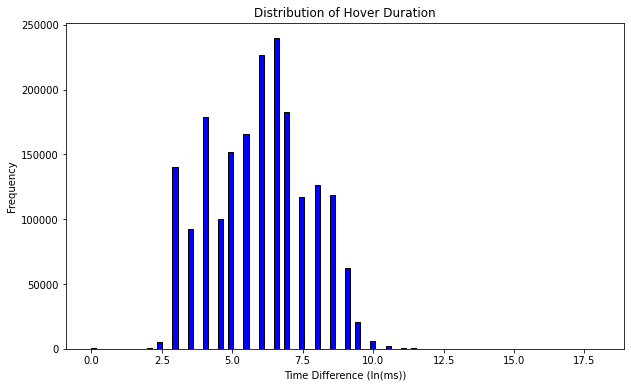

In [120]:
# Create a histogram of 'time_diff'
plt.figure(figsize=(10,6))
plt.hist(under_day_df['hover_duration_log'], bins=100, color='blue', edgecolor='black')
plt.title('Distribution of Hover Duration')
plt.xlabel('Time Difference (ln(ms))')
plt.ylabel('Frequency')
plt.show()

# Sesiones por level

## Media de filas por nivel y media de nunique fqid por nivel

In [143]:
mean_unique_fqids_per_level = under_day_df.groupby(['session_id', 'level'])['fqid'].nunique().groupby('level').mean()
print(mean_unique_fqids_per_level)

level
0      4.873218
1      5.129093
2      5.912805
3      8.197454
4      4.256136
5      6.664516
6     10.712430
7     11.243940
8      5.453939
9     10.266600
10     3.187383
11    14.492392
12     5.710947
13     6.782360
14     4.284126
15     9.547164
16     6.457427
17     6.826612
18    14.665780
19     6.163055
20    12.402818
21    16.776712
22     6.073201
Name: fqid, dtype: float64


In [ ]:
group_sizes = under_day_df.groupby(['session_id', 'level']).size()

In [144]:
mean_rows_per_level = group_sizes.groupby('level').mean()
print(mean_rows_per_level)

level
0      29.191473
1      30.818642
2      42.093339
3      48.524632
4      18.154503
5      28.278621
6      89.715450
7      54.113964
8      37.660389
9      48.163964
10     19.056326
11     81.860145
12     15.524021
13     34.919566
14     23.340439
15     52.877361
16     54.915686
17     51.138504
18    148.169282
19     51.613131
20     47.814676
21     89.341503
22     17.679745
dtype: float64


## Sesiones con 1 fila

In [127]:
# Check if any group has only one row
single_row_sessions = group_sizes[group_sizes == 1]

# Output the result
print(single_row_sessions)

session_id         level
21010617050828700  2        1
dtype: int64


In [140]:
mean_rows_per_session = under_day_df[under_day_df["level"] == 2].groupby("session_id").size().mean()
print(round(mean_rows_per_session,2))

42.1


In [132]:
indices_to_drop = under_day_df[under_day_df['session_id'] == 21010617050828700].index
indices_to_drop


Index([7870663, 7870664, 7870665, 7870666, 7870667, 7870668, 7870669, 7870670,
       7870671, 7870672,
       ...
       7871545, 7871546, 7871547, 7871548, 7871549, 7871550, 7871551, 7871552,
       7871553, 7871554],
      dtype='int64', length=892)

In [133]:
# Drop these rows
under_day_df.drop(indices_to_drop, inplace=True)

In [134]:
under_day_df[under_day_df['session_id'] == 21010617050828700]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log,time_diff,elapsed_time_diff_log,hover_duration_log


## Sesiones con 4 filas o menos

In [141]:
# Check if any group has only one row
four_row_sessions = group_sizes[group_sizes <5]

# Output the result
print(four_row_sessions)
21010617050828700

session_id         level
21010617050828700  2        1
22000316215916784  3        2
dtype: int64


In [153]:
unique_session_ids = set(four_row_sessions.index.get_level_values("session_id"))

In [154]:
under_day_df = under_day_df[~under_day_df['session_id'].isin(unique_session_ids)]

# Refinando datatype del dataset

In [165]:
under_day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25542282 entries, 0 to 26296945
Data columns (total 24 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   session_id             int64   
 1   index                  int64   
 2   elapsed_time           int32   
 3   event_name             category
 4   name                   category
 5   level                  uint8   
 6   page                   float64 
 7   room_coor_x            float32 
 8   room_coor_y            float32 
 9   screen_coor_x          float32 
 10  screen_coor_y          float32 
 11  hover_duration         float32 
 12  text                   category
 13  fqid                   category
 14  room_fqid              category
 15  text_fqid              category
 16  fullscreen             category
 17  hq                     category
 18  music                  category
 19  level_group            category
 20  elapsed_time_log       float16 
 21  time_diff              float64 
 2

In [160]:
for c in under_day_df.columns:
    print(under_day_df[c].info())
    print()

<class 'pandas.core.series.Series'>
Index: 25542282 entries, 0 to 26296945
Series name: session_id
Non-Null Count     Dtype
--------------     -----
25542282 non-null  int64
dtypes: int64(1)
memory usage: 389.7 MB
None

<class 'pandas.core.series.Series'>
Index: 25542282 entries, 0 to 26296945
Series name: index
Non-Null Count     Dtype
--------------     -----
25542282 non-null  int64
dtypes: int64(1)
memory usage: 389.7 MB
None

<class 'pandas.core.series.Series'>
Index: 25542282 entries, 0 to 26296945
Series name: elapsed_time
Non-Null Count     Dtype
--------------     -----
25542282 non-null  int32
dtypes: int32(1)
memory usage: 292.3 MB
None

<class 'pandas.core.series.Series'>
Index: 25542282 entries, 0 to 26296945
Series name: event_name
Non-Null Count     Dtype   
--------------     -----   
25542282 non-null  category
dtypes: category(1)
memory usage: 219.2 MB
None

<class 'pandas.core.series.Series'>
Index: 25542282 entries, 0 to 26296945
Series name: name
Non-Null Count    

In [162]:
log_columns = ["elapsed_time_diff_log", "hover_duration_log", "elapsed_time_log"]

In [170]:
binary = ['fullscreen', 'hq', 'music']

In [ ]:
for c in log_columns:
    under_day_df[c] = under_day_df[c].astype("float16")

In [171]:
for c in binary:
    under_day_df[c] = under_day_df[c].astype("uint8")

C:\Users\gurei\AppData\Local\Temp\ipykernel_17120\2360466524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_day_df[c] = under_day_df[c].astype("uint8")
C:\Users\gurei\AppData\Local\Temp\ipykernel_17120\2360466524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_day_df[c] = under_day_df[c].astype("uint8")
C:\Users\gurei\AppData\Local\Temp\ipykernel_17120\2360466524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

# Guardar dataframes

In [172]:
# Define the output directory and file
output_dir = os.path.join(full_path, 'dataframes')
if not os.path.exists(output_dir):  # create the directory if it doesn't exist
    os.makedirs(output_dir)
output_file = os.path.join(output_dir, 'under_day_df.pkl')
# Save dataframe to pickle file
under_day_df.to_pickle(output_file)